<a href="https://colab.research.google.com/github/00016668/Machine-Learning-Projects/blob/main/KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('https://github.com/RyanNolanData/YouTubeData/raw/main/500hits.csv', encoding='latin-1')
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [24]:
df.shape

(465, 14)

In [6]:
df.isnull().sum()/len(df)*100

,0
PLAYER,0.0
YRS,0.0
G,0.0
AB,0.0
R,0.0
H,0.0
2B,0.0
3B,0.0
HR,0.0
RBI,0.0


In [7]:
df.describe()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.00000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,17.049462,2048.698925,7511.455914,1150.313978,2170.247312,380.952688,78.554839,201.049462,894.260215,783.56129,847.470968,195.905376,58.083871,0.288712,0.329032
std,2.765186,354.391805,1294.065992,289.635071,424.190773,96.483460,49.363030,143.622664,486.193456,327.43195,489.224289,181.845543,48.027509,0.021208,0.474928
min,11.000000,1331.000000,4981.000000,601.000000,1660.000000,177.000000,3.000000,9.000000,0.000000,239.00000,0.000000,7.000000,0.000000,0.246000,0.000000
25%,15.000000,1802.000000,6523.000000,936.000000,1838.000000,312.000000,41.000000,79.000000,640.000000,535.00000,436.000000,63.000000,22.000000,0.273000,0.000000
50%,17.000000,1993.000000,7241.000000,1104.000000,2076.000000,366.000000,67.000000,178.000000,968.000000,736.00000,825.000000,137.000000,52.000000,0.287000,0.000000
75%,19.000000,2247.000000,8180.000000,1296.000000,2375.000000,436.000000,107.000000,292.000000,1206.000000,955.00000,1226.000000,285.000000,84.000000,0.300000,1.000000
max,26.000000,3308.000000,12364.000000,2295.000000,4189.000000,792.000000,309.000000,755.000000,2297.000000,2190.00000,2597.000000,1406.000000,335.000000,0.366000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  465 non-null    object 
 1   YRS     465 non-null    int64  
 2   G       465 non-null    int64  
 3   AB      465 non-null    int64  
 4   R       465 non-null    int64  
 5   H       465 non-null    int64  
 6   2B      465 non-null    int64  
 7   3B      465 non-null    int64  
 8   HR      465 non-null    int64  
 9   RBI     465 non-null    int64  
 10  BB      465 non-null    int64  
 11  SO      465 non-null    int64  
 12  SB      465 non-null    int64  
 13  CS      465 non-null    int64  
 14  BA      465 non-null    float64
 15  HOF     465 non-null    int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 58.3+ KB


In [9]:
df = df.drop(columns=['PLAYER', 'CS'])

In [14]:
X = df.iloc[:,0:13]
y = df.iloc[:,13:]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
# KNN - key neighbours classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [18]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1]


In [19]:
knn.score(X_test, y_test)

0.7634408602150538

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  7]
 [15 15]]


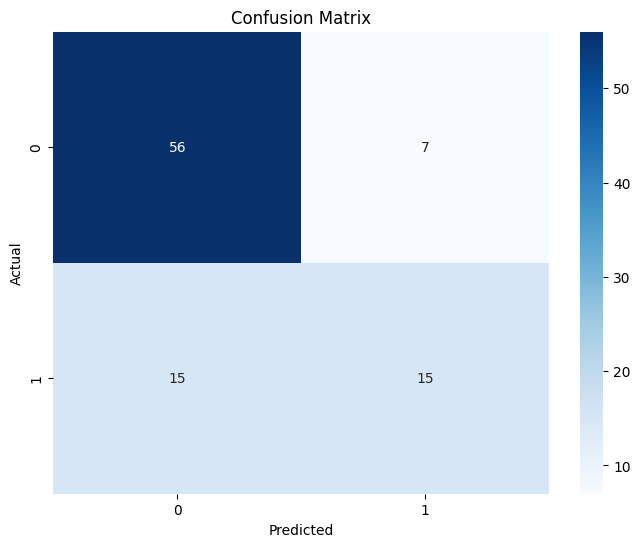

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        63
           1       0.68      0.50      0.58        30

    accuracy                           0.76        93
   macro avg       0.74      0.69      0.71        93
weighted avg       0.75      0.76      0.75        93



In [23]:
print(knn.n_samples_fit_)

372


In [43]:
!git clone https://github.com/00016668/Machine-Learning-Projects.git

Cloning into 'Machine-Learning-Projects'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 1.51 MiB | 4.02 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [45]:
!mv KNN_model.ipynb Machine-Learning-Projects/

mv: cannot stat 'KNN_model.ipynb': No such file or directory
